<a href="https://colab.research.google.com/github/ninadcpa/DSC540/blob/main/Week_3_4_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSC540 Week 3 and 4 Exercise  

@author Ninad Patkhedkar

**1. Data Wrangling with Python: Activity 5, page 116**

In [1]:
# This code is written for mounting code folder checked out from github on google drive
# All assignment code will be maintained inside folder "DSC540"
# Code from book is inside folder "Data-Wrangling-with-Python"

from google.colab import drive
import sys
import os

drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DSC540')
os.chdir('/content/drive/MyDrive/Colab Notebooks/DSC540')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Boston_housing.csv")

In [4]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
df.shape

(506, 14)

In [6]:
df = df.drop(['CHAS','NOX','B','LSTAT'], axis=1)
df.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


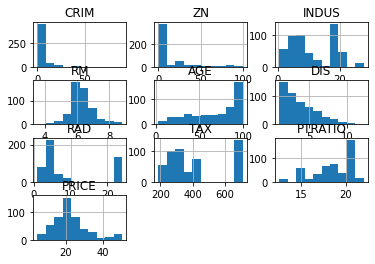

In [7]:
df.hist()
plt.show()

In [8]:
column_names = df.columns.array
column_names

<PandasArray>
['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'PRICE']
Length: 10, dtype: object

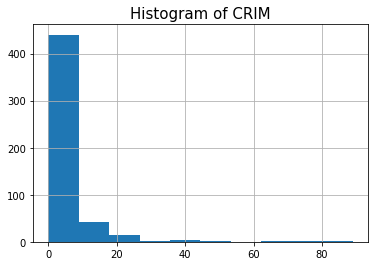

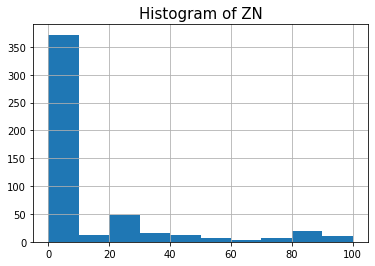

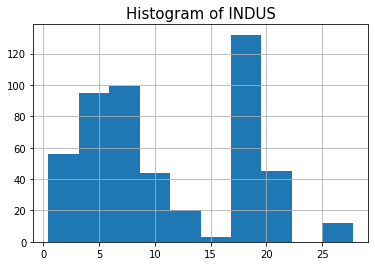

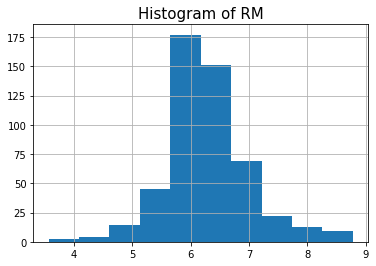

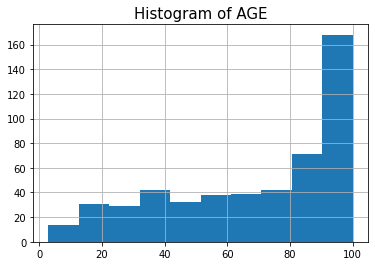

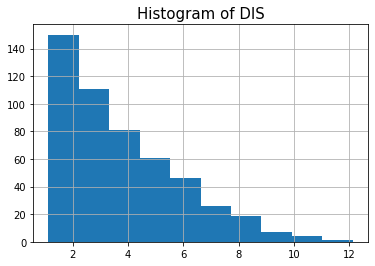

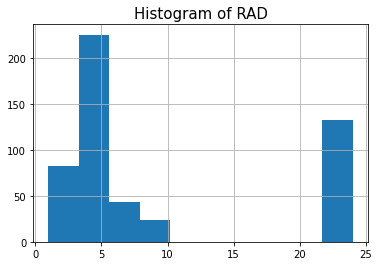

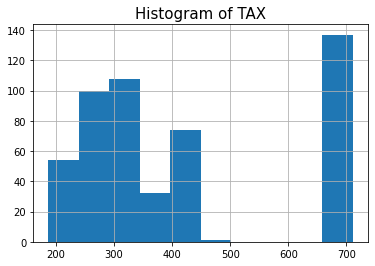

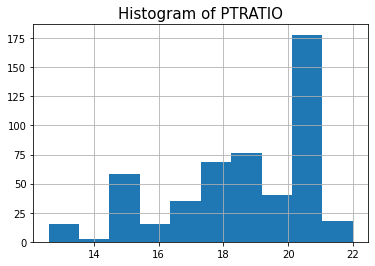

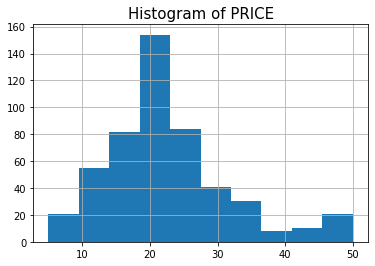

In [9]:
for col in column_names:
  df[col].hist()
  plt.title("Histogram of "+col,fontsize=15)
  plt.show()


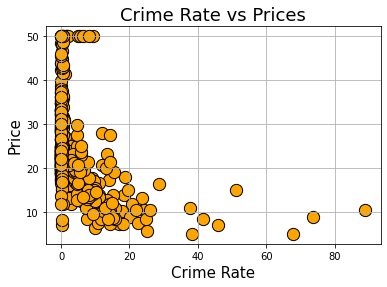

In [10]:
df.plot.scatter('CRIM','PRICE',s=150,c='orange',edgecolor='k')
plt.grid(True)
plt.title('Crime Rate vs Prices',fontsize=18)
plt.xlabel('Crime Rate',fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

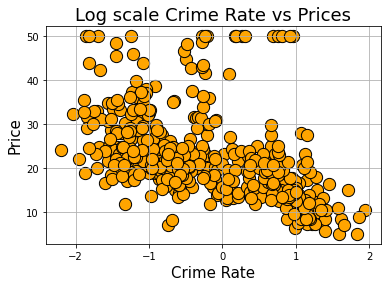

In [11]:
plt.scatter(np.log10(df['CRIM']),df['PRICE'],s=150,c='orange',edgecolor='k')
plt.grid(True)
plt.title('Log scale Crime Rate vs Prices',fontsize=18)
plt.xlabel('Crime Rate',fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

Can you calculate the mean rooms per dwelling?¶

In [12]:
df['RM'].mean()

6.284634387351788

Can you calculate median Age?

In [13]:
df['AGE'].median()

77.5

Can you calculate average (mean) distances to five Boston employment centres?

In [14]:
df['DIS'].mean()

3.795042687747034

Tricky question: Can you calculate the percentage of houses with low price (< $20,000)?

In [15]:
low_price=df['PRICE']<20
# This creates a Boolean array of True, False
print(low_price)
# True = 1, False = 0, so now if you take an average of this Numpy array, you will know how many 1's are there.
# That many houses are priced below 20,000. So that is the answer. 
# You can convert that into percentage by multiplying with 100
pcnt=low_price.mean()*100
print("\nPercentage of house with <20,000 price is: ",pcnt)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505     True
Name: PRICE, Length: 506, dtype: bool

Percentage of house with <20,000 price is:  41.50197628458498



**2. Data Wrangling with Python: Activity 6, page 171** 

In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df= pd.read_csv(url)
df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


Dataframe column names doesn't make any sense.
Lets read column names from catalog/codebook located at  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

In [17]:
import requests
import io
catalog_url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names"
response_string=requests.get(catalog_url).text
s = io.StringIO(response_string)

header_names = []
for line in s:
  if line.startswith(("|","\n",">")):
    pass
  else:
    var=line.split(":")[0]
    header_names.append(var)

header_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

Appending "Income" to header names

In [18]:
header_names.append('Income')
header_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Income']

In [19]:
df = pd.read_csv(url,names=header_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Find missing values in data

In [20]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

There are no missing values.

In [21]:
filtered_df = df[['age','education','occupation']]
filtered_df.head(10)

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
5,37,Masters,Exec-managerial
6,49,9th,Other-service
7,52,HS-grad,Exec-managerial
8,31,Masters,Prof-specialty
9,42,Bachelors,Exec-managerial


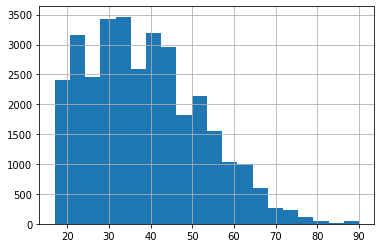

In [22]:
filtered_df['age'].hist(bins=20)

In [23]:
def strip_whitespace(s):
    return s.strip()

In [24]:
filtered_df['education_stripped']=df['education'].apply(strip_whitespace)
filtered_df['education']=filtered_df['education_stripped']
filtered_df.drop(labels=['education_stripped'],axis=1,inplace=True)
# Occupation column
filtered_df['occupation_stripped']=df['occupation'].apply(strip_whitespace)
filtered_df['occupation']=filtered_df['occupation_stripped']
filtered_df.drop(labels=['occupation_stripped'],axis=1,inplace=True)

filtered_df['age']=df['age']

filtered_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
5,37,Masters,Exec-managerial
6,49,9th,Other-service
7,52,HS-grad,Exec-managerial
8,31,Masters,Prof-specialty
9,42,Bachelors,Exec-managerial


In [25]:
filtered_df=filtered_df[(filtered_df['age']>=30) & (filtered_df['age']<=50)]
filtered_df.head(10)

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service
8,31,Masters,Prof-specialty
9,42,Bachelors,Exec-managerial
10,37,Some-college,Exec-managerial
11,30,Bachelors,Prof-specialty
13,32,Assoc-acdm,Sales


In [26]:
filtered_df.groupby(['education']).mean()

,age
education,
10th,39.055921
11th,38.777188
12th,38.362319
1st-4th,39.384615
5th-6th,40.422222
7th-8th,40.617021
9th,38.894737
Assoc-acdm,38.825816
Assoc-voc,38.803851


In [27]:
filtered_df.groupby('occupation').describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,375.0,38.538667,6.198842,30.0,33.00,37.0,43.50,50.0
Adm-clerical,1788.0,39.206376,5.920233,30.0,34.00,39.0,44.00,50.0
Armed-Forces,4.0,37.250000,6.898067,30.0,33.00,36.5,40.75,46.0
Craft-repair,2429.0,39.044874,5.895650,30.0,34.00,38.0,44.00,50.0
Exec-managerial,2479.0,40.091166,5.759625,30.0,35.00,40.0,45.00,50.0
Farming-fishing,455.0,39.294505,5.546070,30.0,35.00,39.0,43.00,50.0
Handlers-cleaners,533.0,38.045028,5.939374,30.0,33.00,37.0,43.00,50.0
Machine-op-inspct,1090.0,39.240367,5.936225,30.0,34.00,39.0,44.00,50.0
Other-service,1305.0,38.627586,5.907714,30.0,34.00,38.0,44.00,50.0


Priv-house-serv profession has highest average age.

Exec managerial and Prof speciality both occupation group has largest share of workforce above 75th percentile.

In [28]:
occupation_stats= filtered_df.groupby('occupation').describe()['age']

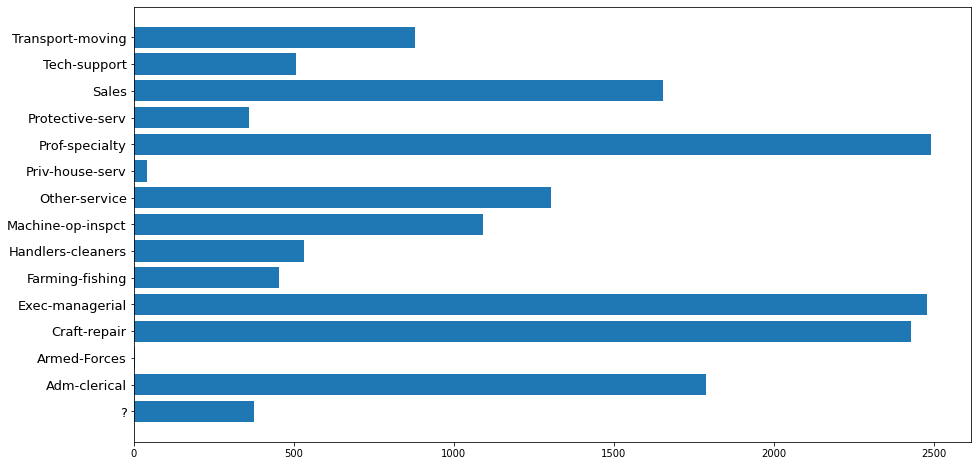

In [29]:
plt.figure(figsize=(15,8))
plt.barh(y=occupation_stats.index,width=occupation_stats['count'])
plt.yticks(fontsize=13)
plt.show()

In [30]:
df_1 = df[['age','workclass','occupation']].sample(5,random_state=101)

In [31]:
df_1.head()

,age,workclass,occupation
22357,51,Private,Machine-op-inspct
26009,19,Private,Sales
20734,40,Private,Exec-managerial
17695,17,Private,Handlers-cleaners
27908,61,Private,Craft-repair


In [32]:
df_2 = df[['education','race','occupation']].sample(5,random_state=101)

In [33]:
df_2.head()

,education,race,occupation
22357,HS-grad,White,Machine-op-inspct
26009,11th,White,Sales
20734,HS-grad,White,Exec-managerial
17695,10th,White,Handlers-cleaners
27908,7th-8th,White,Craft-repair


In [35]:
df_merged = pd.merge(df_1,df_2,on='occupation',how='inner').drop_duplicates()
df_merged

,age,workclass,occupation,education,race
0,51,Private,Machine-op-inspct,HS-grad,White
1,19,Private,Sales,11th,White
2,40,Private,Exec-managerial,HS-grad,White
3,17,Private,Handlers-cleaners,10th,White
4,61,Private,Craft-repair,7th-8th,White


**3. Create a series and practice basic arithmetic steps**

a. Series 1 = 7.3, -2.5, 3.4, 1.5

i. Index = ‘a’, ‘c’, ‘d’, ‘e’

In [36]:
list_a = [7.3, -2.5, 3.4, 1.5]
index_a = ['a','b','c','d']

series_a = pd.DataFrame(data=list_a,index=index_a)
series_a

,0
a,7.3
b,-2.5
c,3.4
d,1.5


b. Series 2 = -2.1, 3.6, -1.5, 4, 3.1

i. Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’

In [38]:
list_b =[-2.1, 3.6, -1.5, 4, 3.1]
index_b = ['a', 'c', 'e', 'f', 'g']

series_b = pd.DataFrame(list_b,index_b)
series_b

,0
a,-2.1
c,3.6
e,-1.5
f,4.0
g,3.1


c. Add Series 1 and Series 2 together and print the results

In [39]:
added_series = series_a + series_b
added_series

,0
a,5.2
b,NaN
c,7.0
d,NaN
e,NaN
f,NaN
g,NaN


d. Subtract Series 1 from Series 2 and print the results

In [40]:
subtracted_series = series_b - series_a
subtracted_series

,0
a,-9.4
b,NaN
c,0.2
d,NaN
e,NaN
f,NaN
g,NaN
